In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import yaml
import matplotlib.pyplot as plt

from dm_control import mjcf

from flygym.util.data import mujoco_groundwalking_model_path
from flygym.util.data import default_pose_path
from flygym.util.config import all_leg_dofs
from flygym.terrain.mujoco_terrain import \
    FlatTerrain, GapedTerrain, ExtrudingBlocksTerrain

In [3]:
def load_fly():
    # Load NMF model
    model = mjcf.from_path(mujoco_groundwalking_model_path)
    with open(default_pose_path) as f:
        init_pose = {k: np.deg2rad(v)
                        for k, v in yaml.safe_load(f)['joints'].items()}
    init_pose = {k: v for k, v in init_pose.items() if k in all_leg_dofs}

    # Set all bodies to default position (joint angle) even if the
    # joint is unactuated
    for body in model.find_all('body'):
        if (key := f'joint_{body.name}') in init_pose:
            if body.name.endswith('_yaw'):
                rot_axis = [1, 0, 0]
            elif body.name.endswith('_roll'):
                rot_axis = [0, 0, 1]
            else:    # pitch
                rot_axis = [0, 1, 0]
            # replace hardcoded quaternion with axis-angle
            # (x, y, z, angle). See https://mujoco.readthedocs.io/en/stable/XMLreference.html#corientation
            del body.quat
            body.axisangle = [*rot_axis, init_pose[key]]
    
    return model

(-0.5, 319.5, 239.5, -0.5)

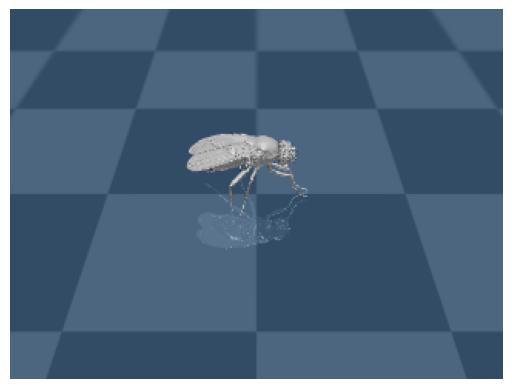

In [4]:
flat = FlatTerrain()
model = load_fly()
flat.spawn_entity(model, rel_pos=(0, 0, 600), rel_angle=(0, 1, 0, 0.1))
physics = mjcf.Physics.from_mjcf_model(flat.arena)
plt.imshow(physics.render())
plt.axis('off')

(-0.5, 319.5, 239.5, -0.5)

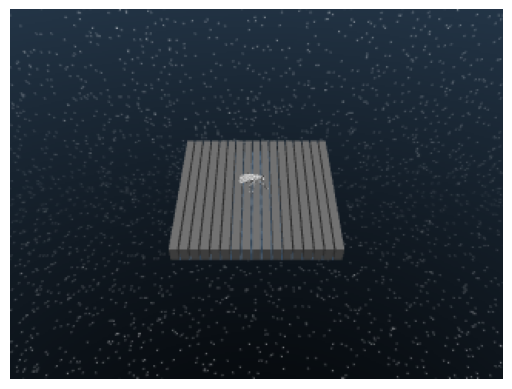

In [5]:
gaped = GapedTerrain()
model = load_fly()
gaped.spawn_entity(model, rel_pos=(0, 0, 600), rel_angle=(0, 1, 0, 0.1))
physics = mjcf.Physics.from_mjcf_model(gaped.arena)
plt.imshow(physics.render())
plt.axis('off')

(-0.5, 319.5, 239.5, -0.5)

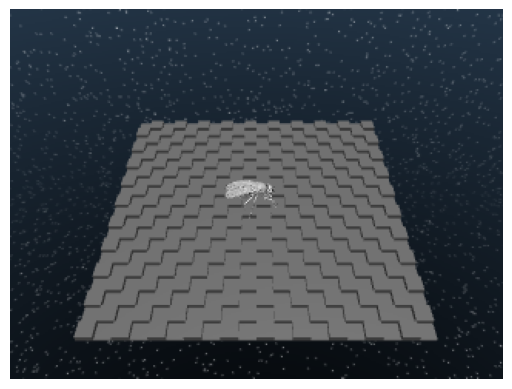

In [6]:
box = ExtrudingBlocksTerrain()
model = load_fly()
box.spawn_entity(model, rel_pos=(0, 0, 600), rel_angle=(0, 1, 0, 0.1))
physics = mjcf.Physics.from_mjcf_model(box.arena)
plt.imshow(physics.render())
plt.axis('off')